In [1]:
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt

In [2]:
%load_ext Cython

In [11]:
%%cython -a
import numpy as np
cimport numpy as np

cdef int Nx = 256
cdef int Ny = 256
cdef int Nz = 256

cdef float beta, phase
cdef int i,j,k


def calculate_3d_velocity( np.float64_t beta ):
    
    
    cdef np.ndarray[np.float64_t, ndim = 1] kx, ky, kz
    cdef np.ndarray[np.float64_t, ndim = 3] Amp_K, phase3d
    cdef np.ndarray[np.complex128_t, ndim = 3] V_x
    
    kx = np.fft.fftfreq( Nx, d = 1.0/Nx ) + 0.01
    ky = np.fft.fftfreq( Ny, d = 1.0/Nx ) + 0.01
    kz = np.fft.fftfreq( Nz, d = 1.0/Nx ) + 0.01
    Amp_K = np.zeros((Nx,Ny,Nz))
    phase3d = np.random.random((Nx,Ny,Nz))
    
    for i in range(Nx):
        for j in range(Ny):
            for k in range(Nz):
                phase = phase3d[i,j,k] * 2.0 * 3.14159
                Rk = np.sqrt(kx[i]**2.0 + ky[j]**2.0 + kz[k]**2.0)
                Amp_K[i,j,k] = Rk**(-beta/2.0)* np.cos(phase)
    print('Done with Matrix')
    V_x = np.fft.fftn(Amp_K)
    
    return V_x

In [16]:
V_x = calculate_3d_velocity( 3.0 )

Done with Matrix


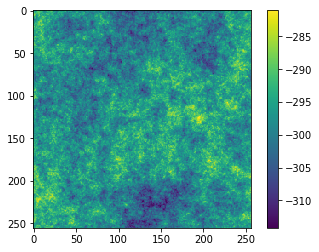

In [47]:
z = numpy.random.randint(0,256)
plt.imshow( (V_x.real[:,:,z] ) )
plt.colorbar()

(0, 687802.5)

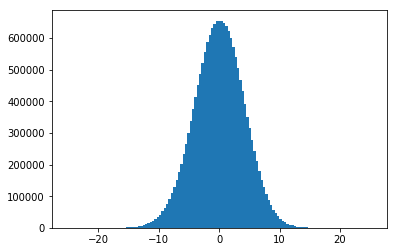

In [19]:
import numpy
V_x1 = V_x.real - V_x.real.mean()
V_x2 = V_x.imag - V_x.imag.mean()


Nv = 128
bins = numpy.linspace( -25.0 , 25.0 ,  Nv + 1)
count, bins =  numpy.histogram( V_x1.flatten(), bins = bins)

binc = 0.5*(bins[1:] + bins[:-1])

plt.bar(binc, count)
plt.ylim(0)


In [58]:
V_x.real.mean()

-297.5591916600424

In [64]:
Nv = 128
Nx = 256
Ny = 256

ppv = numpy.zeros((Nx,Ny,Nv))

bins = numpy.linspace( -15.0 , 15.0 ,  Nv + 1)

for i in range(Nx):
    for j in range(Ny):
        count, _ = numpy.histogram(V_x1[i,j,:], bins = bins)
        
        ppv[i,j,:] = count.astype('float32')



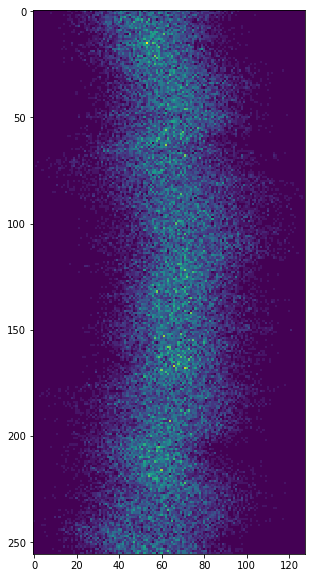

In [65]:
plt.figure(figsize=(10,10))
x = numpy.random.randint(0,128)
plt.imshow( ppv[x, :,: ] )

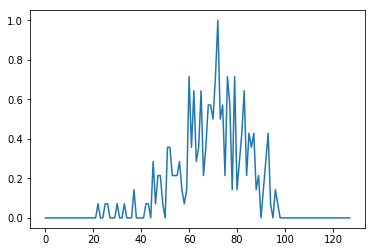

In [70]:
x = numpy.random.randint(0,256)
y = numpy.random.randint(0,256)


plt.plot(ppv[x,y,:]/ ppv[x,y,:].max() )

In [98]:
ppv[123,22,:].sum()

128.0

In [35]:
Pk =  numpy.abs(numpy.fft.fftn(V_x))**2.0

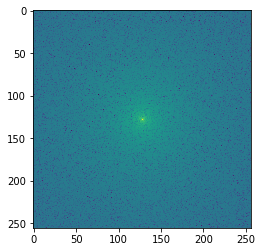

In [43]:
plt.imshow( numpy.log10( np.fft.fftshift(Pk[:,:,0]) ) )